In [2]:
# compute metrics for large dataset from results flder and gt folder
import cv2
import numpy as np
import glob
import os
import sys
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt

In [3]:
DEFAULT_ALPHA = 1.0 / 9

In [4]:
from google.colab import files, drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
######################Pratt Figure of Merit#############################################
def fom(edges_img, edges_gold, alpha = DEFAULT_ALPHA):
    N, M = edges_img.shape
    dist = distance_transform_edt(np.logical_not(edges_gold))
    fom = 1.0 / np.maximum(np.count_nonzero(edges_img),np.count_nonzero(edges_gold))
    for i in range(0, N):
        for j in range(0, M):
            if edges_img[i, j]:
              fom += 1.0 / ( 1.0 + dist[i, j] * dist[i, j] * alpha)
    
    fom /= np.maximum(np.count_nonzero(edges_img),np.count_nonzero(edges_gold))    
    return fom
#################################################################

In [6]:
from google.colab.patches import cv2_imshow

In [7]:
######################Do a pixel on pixel comparison to check the optimal thresholdvalue########
precision_list = []
recall_list = []
thresh_list = []
acc_list = []
f_score_list = []


for i in range(255):
	
	# file = "/content/gdrive/MyDrive/COMP0132/gnd_thresh_724.png"
	file = "/content/gdrive/MyDrive/COMP0132/gnd_unthresh.png"

	file1 = "/content/gdrive/MyDrive/COMP0132/map_with_intensity_2.png"


	test_img = cv2.imread(file)
	gray_scale_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
	# cv2_imshow(gray_scale_test_img)

	gt_img = cv2.imread(file1)
	grayscale_gt_img = cv2.cvtColor(gt_img, cv2.COLOR_BGR2GRAY)
	# cv2_imshow(grayscale_gt_img)


	ret,gray_scale_threshold_img = cv2.threshold(gray_scale_test_img,i,255,cv2.THRESH_BINARY)
	# cv2_imshow(gray_scale_threshold_img)
 
	intersection = np.logical_and(grayscale_gt_img, gray_scale_threshold_img)

	union = np.logical_or(grayscale_gt_img, gray_scale_threshold_img)

	T1= np.count_nonzero(grayscale_gt_img) # tp+fn

	T2= np.count_nonzero(gray_scale_threshold_img) # tp+fp

	T3= np.sum(intersection) #tp

	T4= np.sum(union)# 
	recall= (T3*1.00/T1) # tp/tp+fn
	precision = (T3*1.00/T2) #tp/tp+fp
	f_score= 2.0*(recall*precision)/(recall+precision+.00001)
	iou = T3*1.0 /(T1+T2-T3)#tp/tp+fp+fn
	acc = ((T3+ (gt_img.shape[0]* gt_img.shape[1])-T2)*1.00/(T1-T3+ (gt_img.shape[0]* gt_img.shape[1]))) # tp+tn/tp+tn+fp+fn

	# TPR= recall, FPR= fp/fp+tn, tn=all - T2, fp= T2-T3, FPR= T2-T3/( all-T3) 
	fpr= (T2-T3)*1.0/((gt_img.shape[0]* gt_img.shape[1]) - T3) 

	precision_list.append(precision)
	recall_list.append(recall)
	thresh_list.append(i)
	acc_list.append(acc)
	f_score_list.append(f_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


In [30]:
precision_array = np.array(precision_list)
recall_array = np.array(recall_list)
thresh_array = np.array(thresh_list)
f_score_array = np.array(f_score_list)

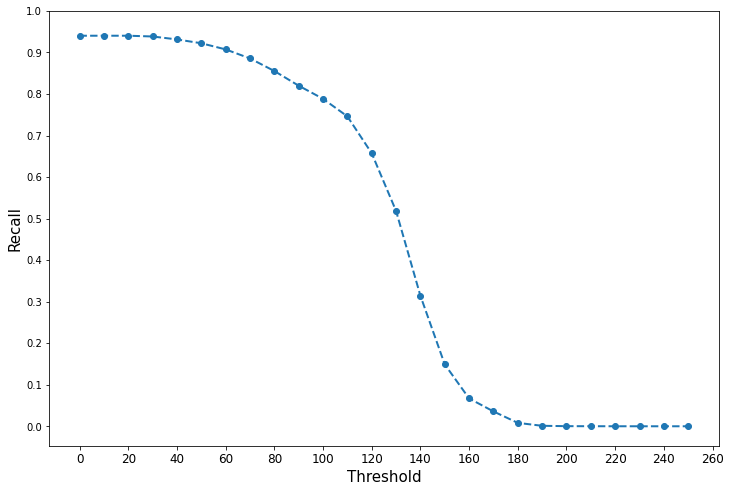

In [31]:
thresh_array_new = thresh_array[::10]
recall_array_new = recall_array[::10]
# print(len(recall_array_new))
# plt.plot(thresh_array, recall_array, linestyle = "dashed", linewidth = 2, marker = "o")
plt.plot(thresh_array_new, recall_array_new, linestyle = "dashed", linewidth = 2, marker = "o")
plt.xticks(np.arange(0, max(thresh_array_new)+20, 20), fontsize = 12)
plt.yticks(np.arange(0, max(recall_array_new)+0.1, 0.1))
plt.xlabel("Threshold", fontsize = 15)
plt.ylabel("Recall", fontsize = 15)

# loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals


# plt.title("Threshold vs Recall Curve for all Possible Intensity Value", fontsize = 19)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

Text(0, 0.5, 'Precision')

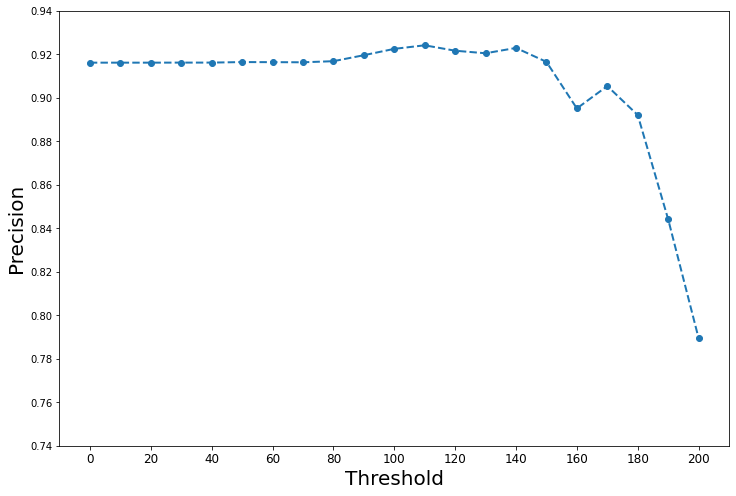

In [32]:
thresh_array_pr = thresh_array[:210]
precision_array_pr = precision_array[:210]

thresh_array_new = thresh_array_pr[::10]
precision_array_new = precision_array_pr[::10]
# print(len(recall_array_new))
# plt.plot(thresh_array, recall_array, linestyle = "dashed", linewidth = 2, marker = "o")
plt.plot(thresh_array_new, precision_array_new, linestyle = "dashed", linewidth = 2, marker = "o")
plt.xticks(np.arange(0, max(thresh_array_new)+10, 20), fontsize = 12)
plt.yticks(np.arange(0.74, max(precision_array_new)+0.02, 0.02))
plt.xlabel("Threshold", fontsize = 20)
plt.ylabel("Precision", fontsize = 20)
